In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

In [2]:
# read dataframe
df = pd.read_csv("adsb-attacks.csv")
print (df.columns.tolist())
df.head()

['id', 'airlineId', 'callsign', 'flightNumber', 'transponderCode', 'heading', 'longitude', 'latitude', 'altitude', 'speed', 'groundSpeed', 'groundTrack', 'takeOffTime', 'trueAirSpeed', 'radial', 'distance', 'origin', 'destination', 'taxi_start', 'attackType']


,id,airlineId,callsign,flightNumber,transponderCode,heading,longitude,latitude,altitude,speed,groundSpeed,groundTrack,takeOffTime,trueAirSpeed,radial,distance,origin,destination,taxi_start,attackType
0,aircraft-1209,asa,ASA96,96,3417,5.028252,-121.637281,47.130219,15000.0,320.0,405.524540,-1.235791,0.0,396.80,1.902720,61.933732,NaN,ksea,0,No attack
1,aircraft-1213,asa,ASA87,87,5516,5.035964,-121.170099,46.913760,19000.0,320.0,426.607700,-1.228065,0.0,417.28,1.898454,104.515735,NaN,ksea,0,No attack
2,aircraft-1217,qxe,QXE8446,8446,1746,5.042546,-120.866070,46.770868,20000.0,320.0,431.917087,-1.221586,0.0,422.40,1.898554,132.355476,NaN,ksea,0,No attack
3,aircraft-1221,asa,ASA8512,8512,7662,5.125558,-120.339429,46.510792,27000.0,320.0,469.414635,-1.140234,0.0,458.24,1.904981,181.379084,NaN,ksea,0,No attack
4,aircraft-1225,aal,AAL94,94,7240,5.125558,-120.019638,46.328974,30000.0,320.0,485.212861,-1.140141,0.0,473.60,1.917626,212.694963,NaN,ksea,0,No attack


In [3]:
# extract attack list
attk_list = df['attackType'].unique().tolist()
attk_list

['No attack',
 'Non-responsive aircraft',
 'Jumping aircraft',
 'Aircraft displaying false information',
 'Aircraft standing still',
 'Trajectory modification',
 'Transponder code alteration',
 'Aircraft spoofing',
 'Ghost injection',
 'Message Delay']

A plot for each attack

Non-responsive aircraft

In [4]:
# nothing to see here
attk = "Non-responsive aircraft"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    print (sub[['id', 'attackType']])
    print ("*********")

                  id         attackType
5      aircraft-1229          No attack
38     aircraft-1229          No attack
71     aircraft-1229          No attack
104    aircraft-1229          No attack
137    aircraft-1229          No attack
...              ...                ...
24407  aircraft-1229  Aircraft spoofing
24418  aircraft-1229          No attack
24442  aircraft-1229  Aircraft spoofing
24453  aircraft-1229          No attack
24477  aircraft-1229  Aircraft spoofing

[924 rows x 2 columns]
*********
                  id attackType
10     aircraft-1249  No attack
43     aircraft-1249  No attack
76     aircraft-1249  No attack
109    aircraft-1249  No attack
142    aircraft-1249  No attack
...              ...        ...
24318  aircraft-1249  No attack
24353  aircraft-1249  No attack
24388  aircraft-1249  No attack
24423  aircraft-1249  No attack
24458  aircraft-1249  No attack

[713 rows x 2 columns]
*********
                  id attackType
20     aircraft-1289  No attack
53  

Jumping aircraft

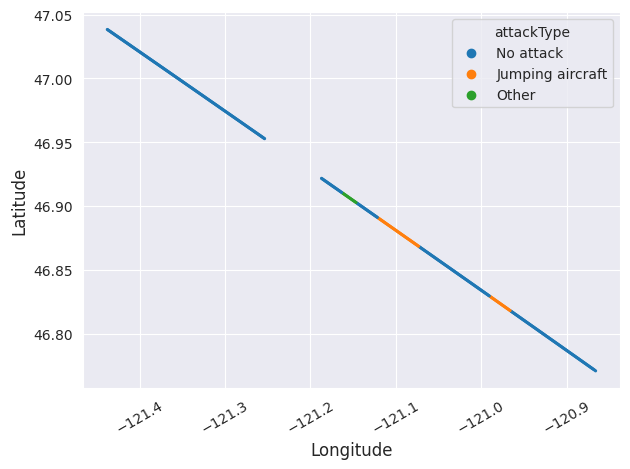

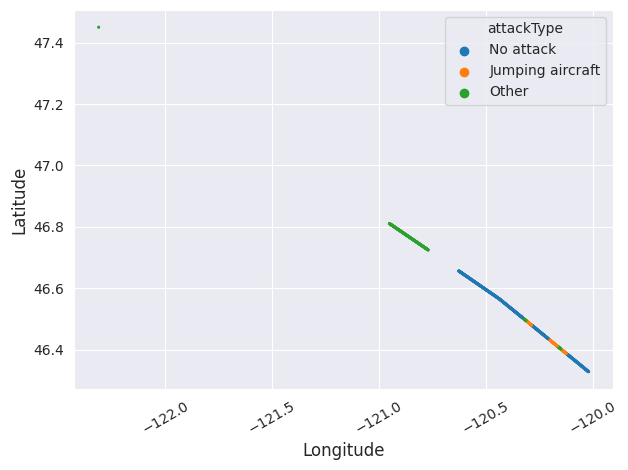

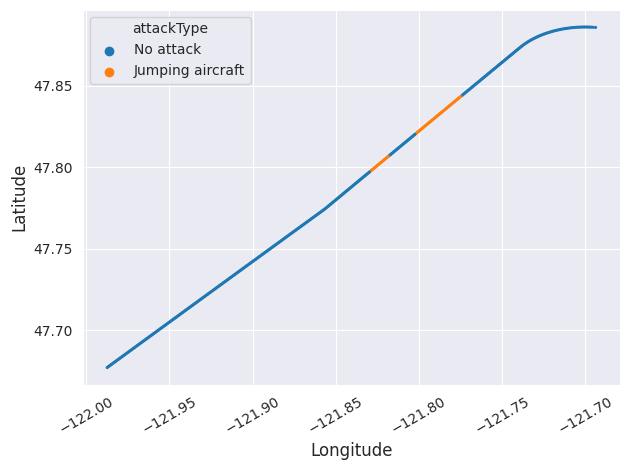

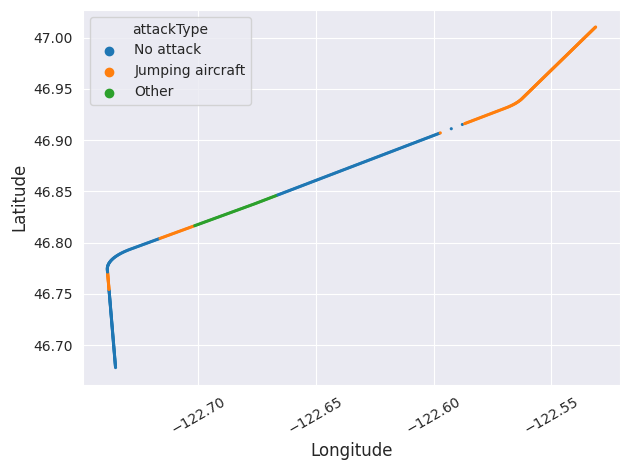

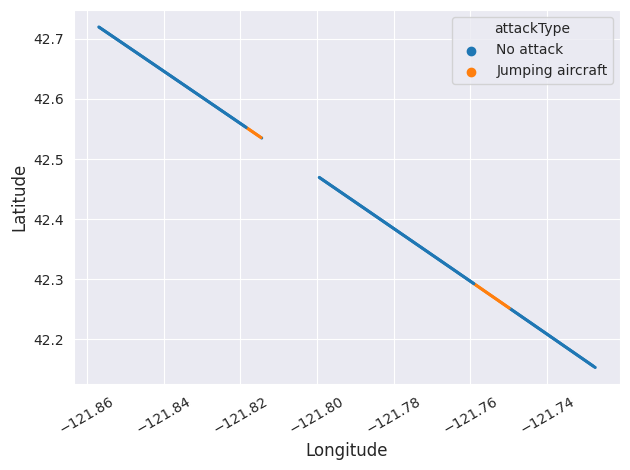

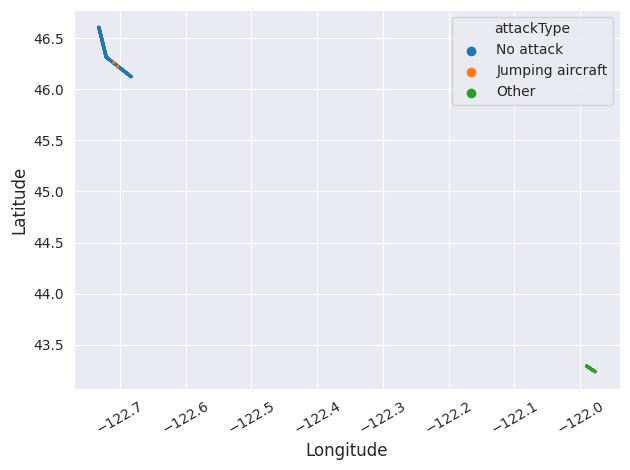

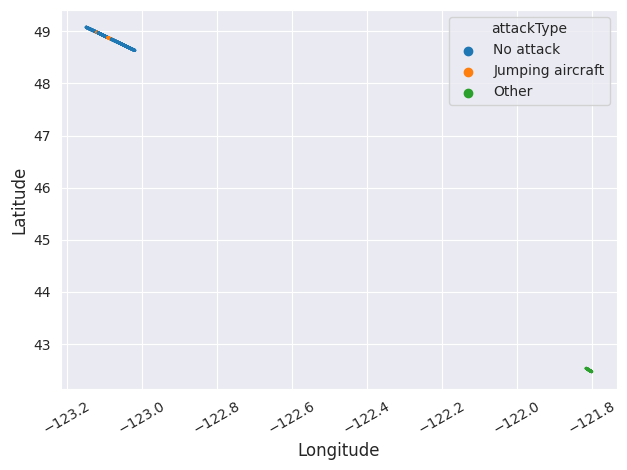

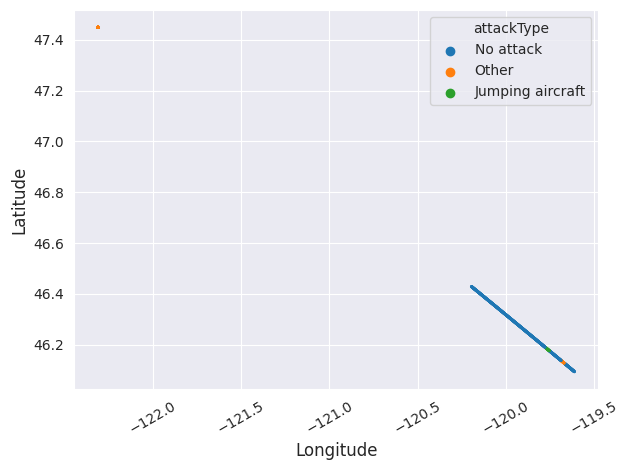

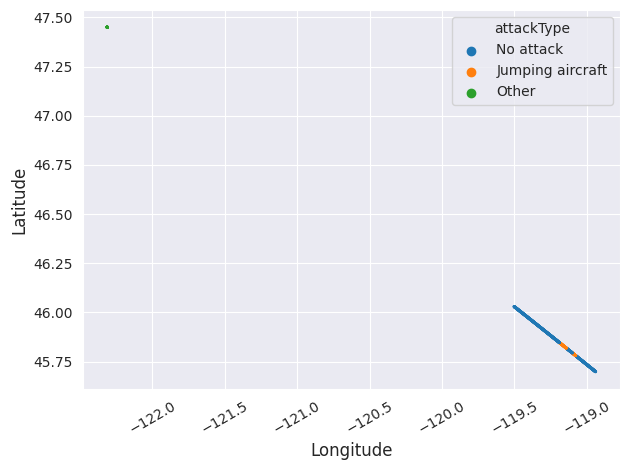

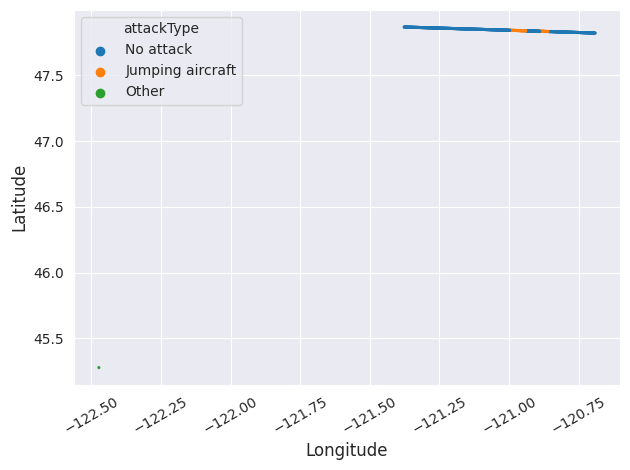

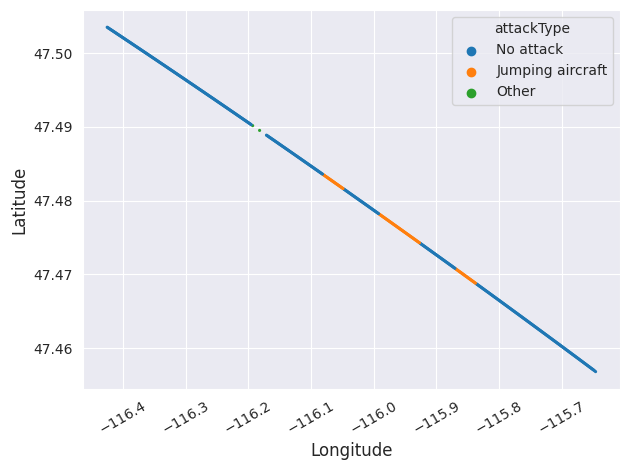

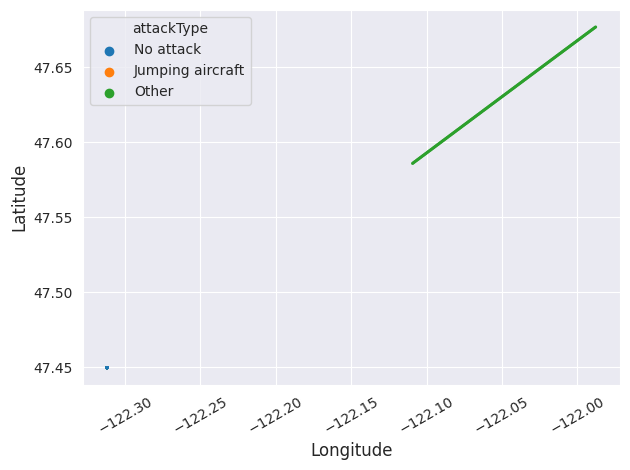

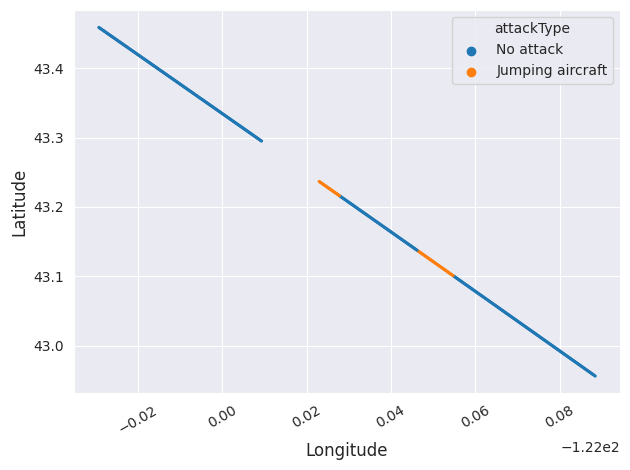

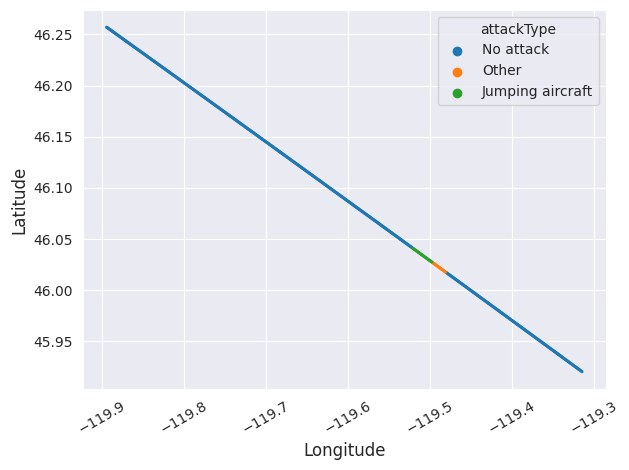

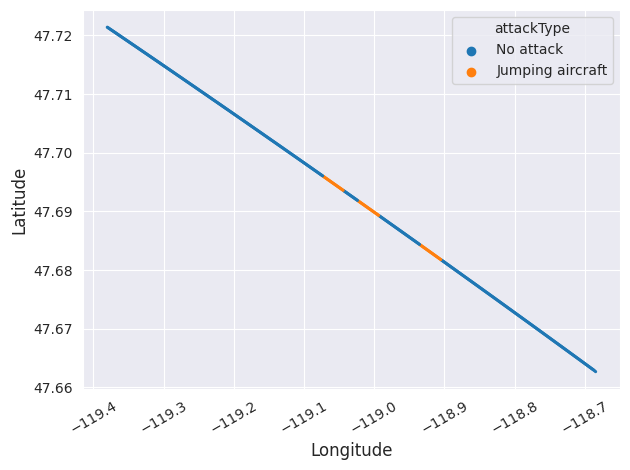

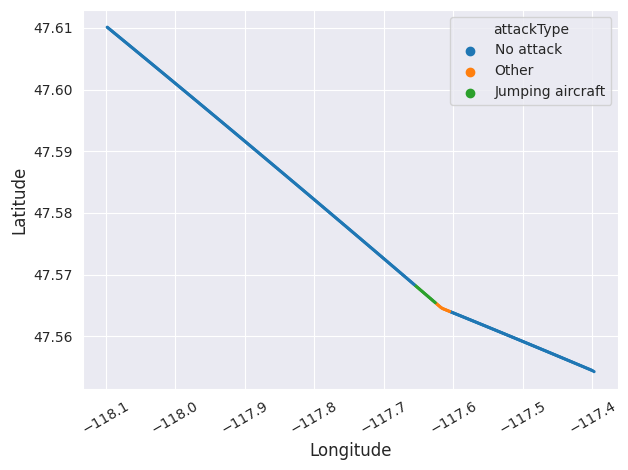

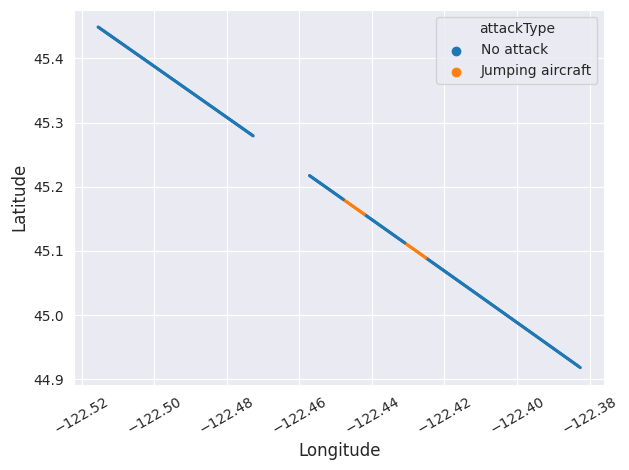

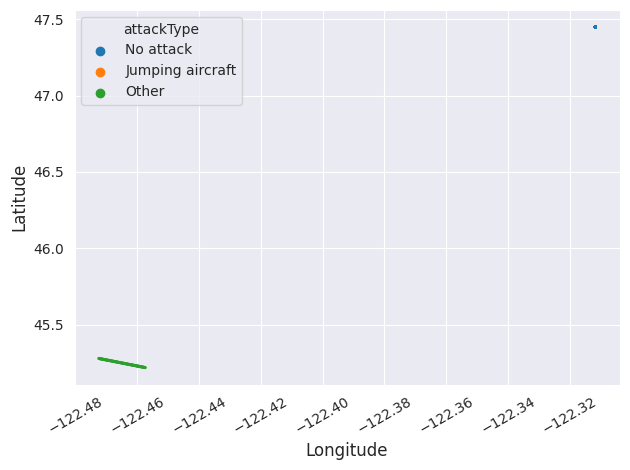

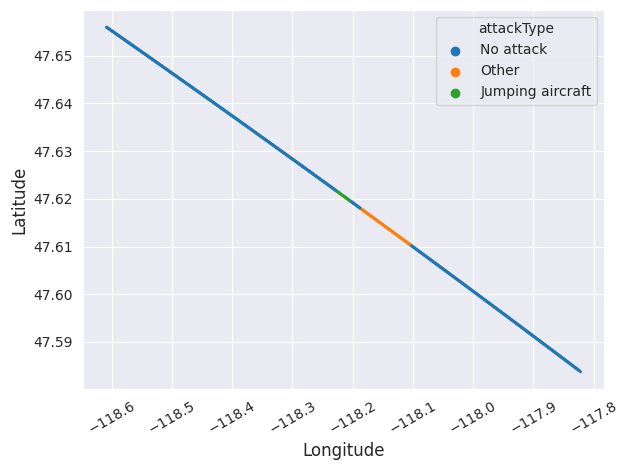

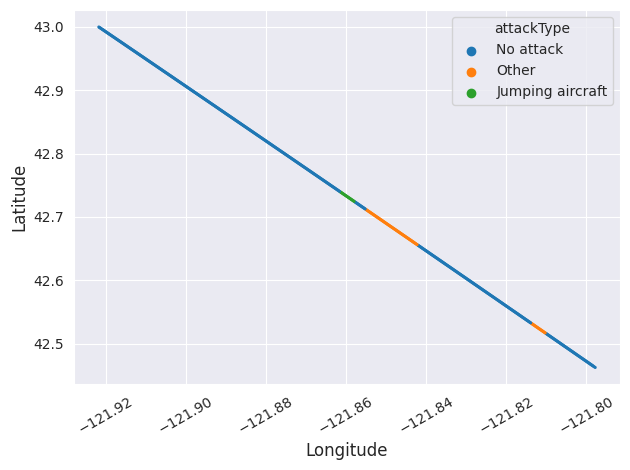

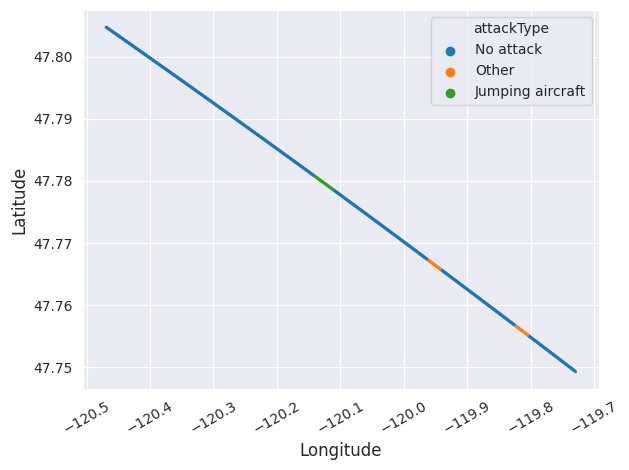

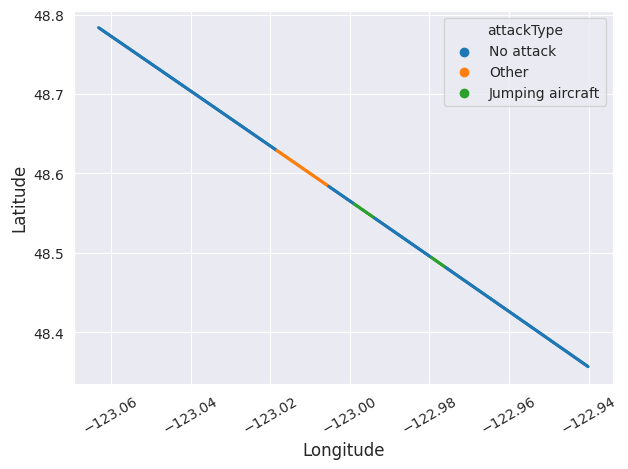

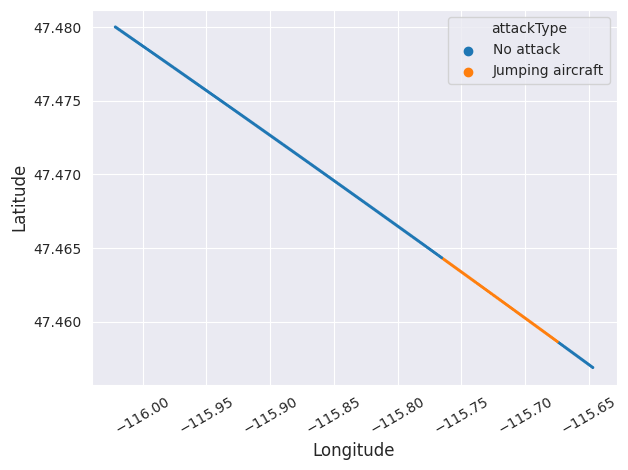

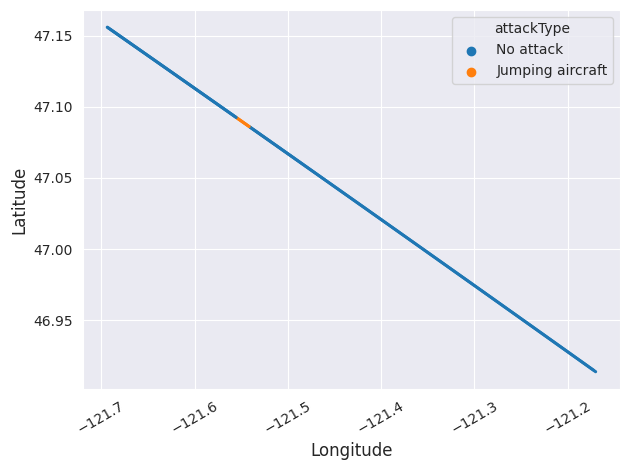

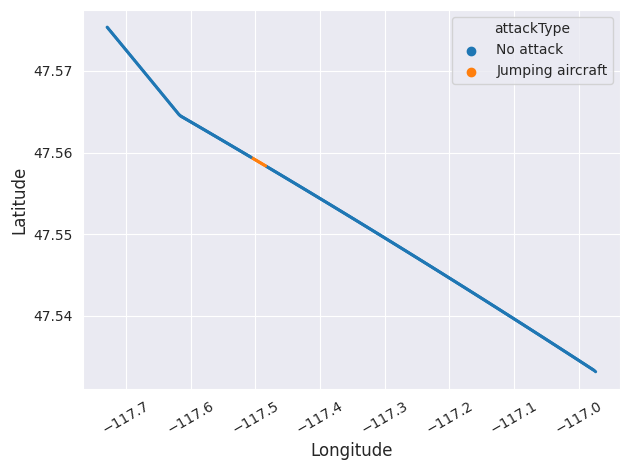

In [5]:
attk = "Jumping aircraft"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    sub = sub.reset_index()
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="longitude", y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Longitude", fontsize=12)
    p.set_ylabel("Latitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Aircraft displaying false information

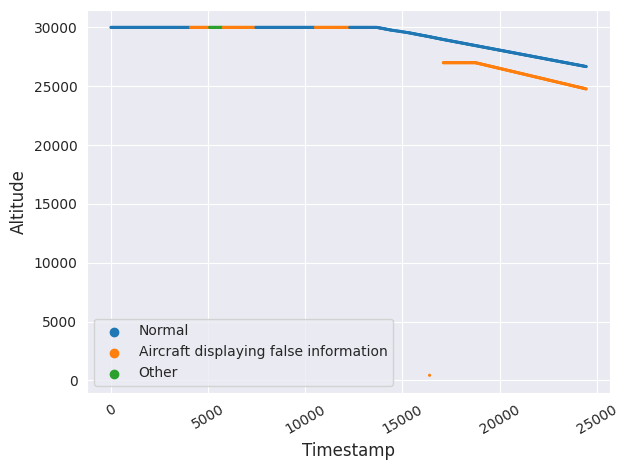

In [6]:
attk = "Aircraft displaying false information"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="altitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Altitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    p.legend(leg_handles, ['Normal', attk, "Other"])
    plt.tight_layout()
    plt.show()

Aircraft standing still

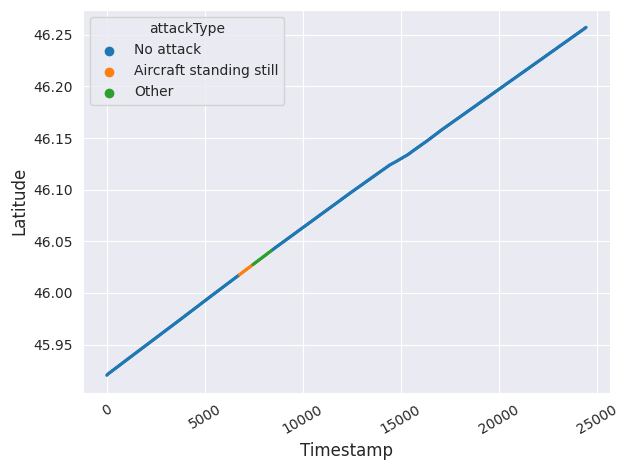

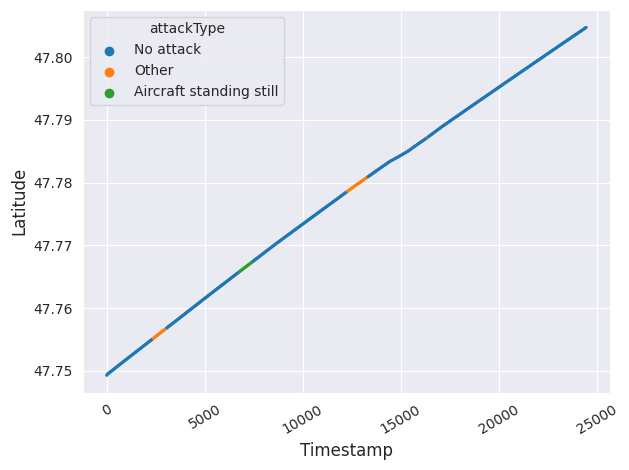

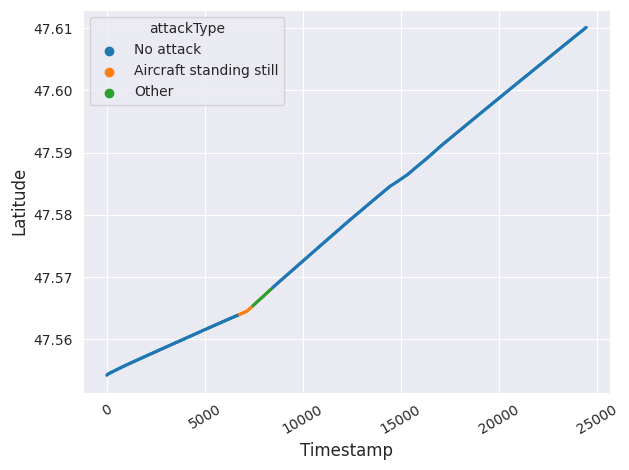

In [7]:
# nothing much to show here
attk = "Aircraft standing still"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Latitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Trajectory modification

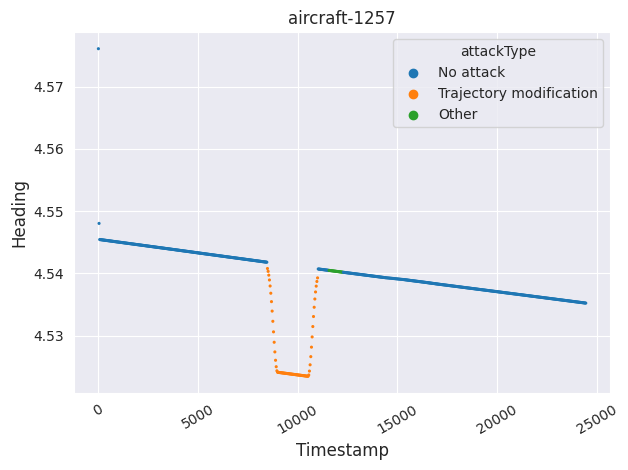

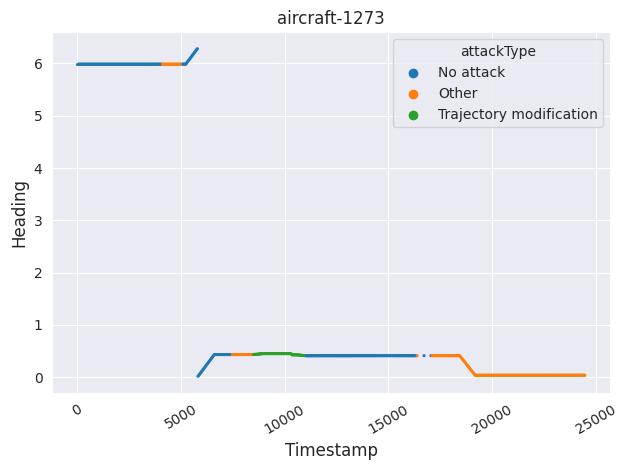

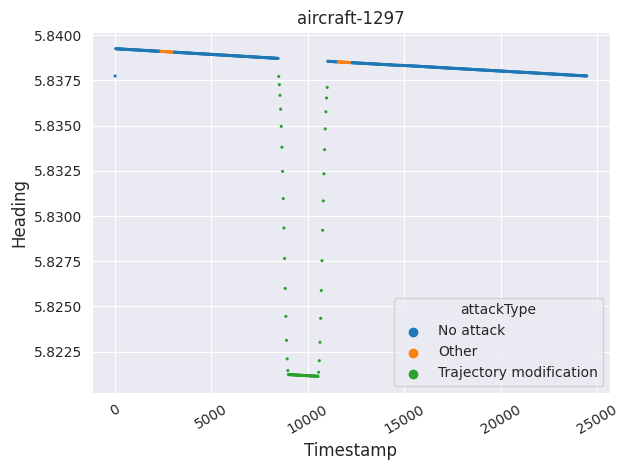

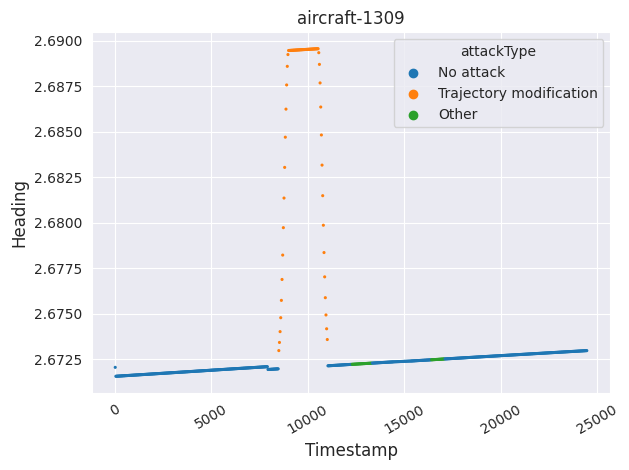

In [8]:
attk = "Trajectory modification"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="heading", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Transponder code alteration

In [9]:
# not much to plot
attk = "Transponder code alteration"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    print (sub[['id', 'transponderCode']])
    print ("Different tansponder code: " + str(len(sub['transponderCode'].unique())))
    print ("**********")

                  id  transponderCode
2      aircraft-1217             1746
35     aircraft-1217             1746
68     aircraft-1217             1746
101    aircraft-1217             1746
134    aircraft-1217             1746
...              ...              ...
24310  aircraft-1217             1746
24345  aircraft-1217             1746
24380  aircraft-1217             1746
24415  aircraft-1217             1746
24450  aircraft-1217             1746

[632 rows x 2 columns]
Different tansponder code: 2
**********
                  id  transponderCode
4      aircraft-1225             7240
37     aircraft-1225             7240
70     aircraft-1225             7240
103    aircraft-1225             7240
136    aircraft-1225             7240
...              ...              ...
24382  aircraft-1225             7240
24416  aircraft-1225             7662
24417  aircraft-1225             7240
24451  aircraft-1225             7662
24452  aircraft-1225             7240

[925 rows x 2 columns]


Aircraft spoofing

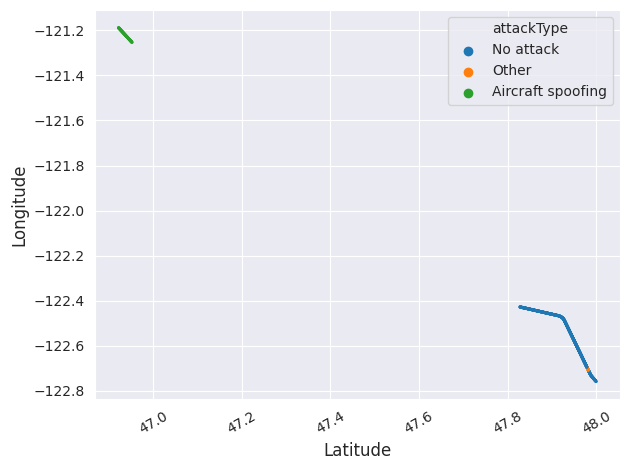

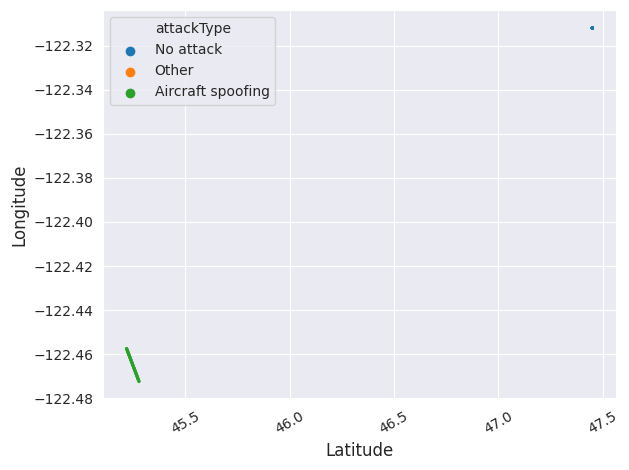

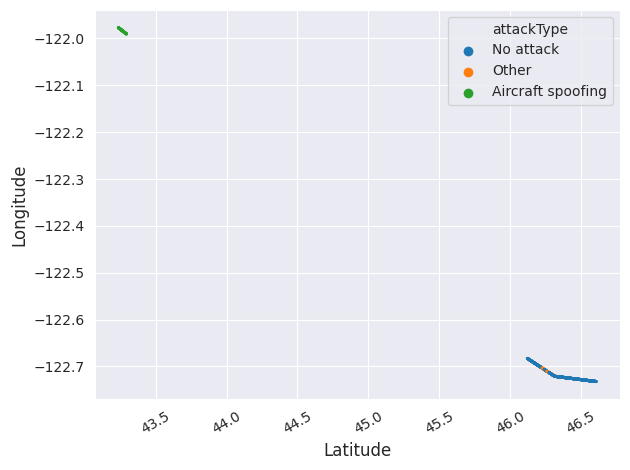

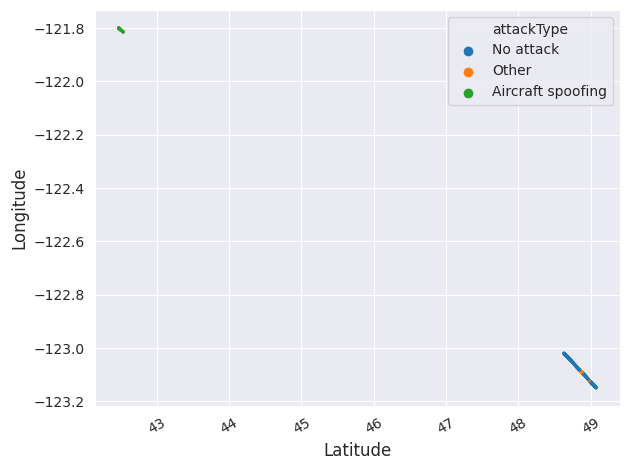

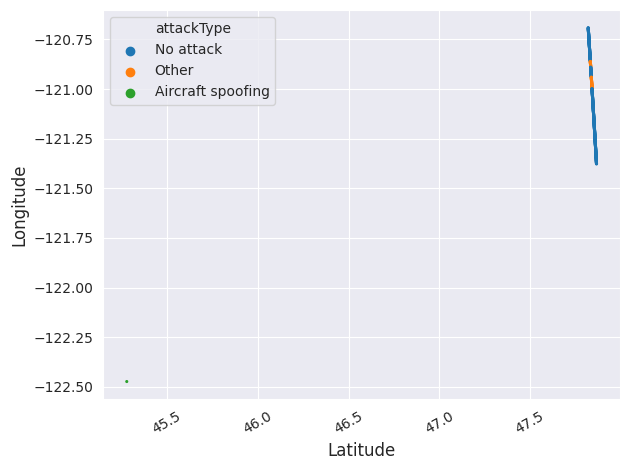

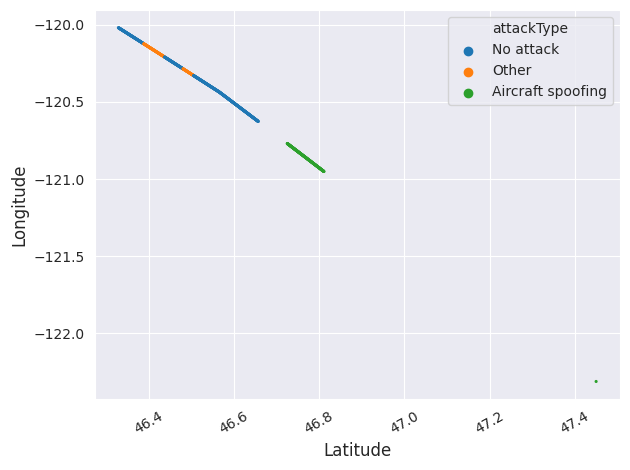

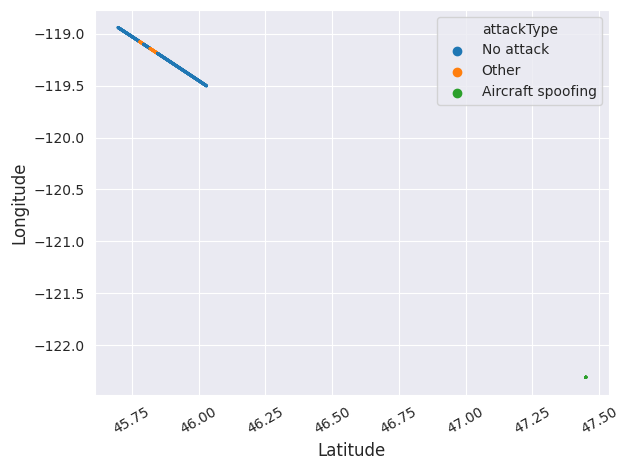

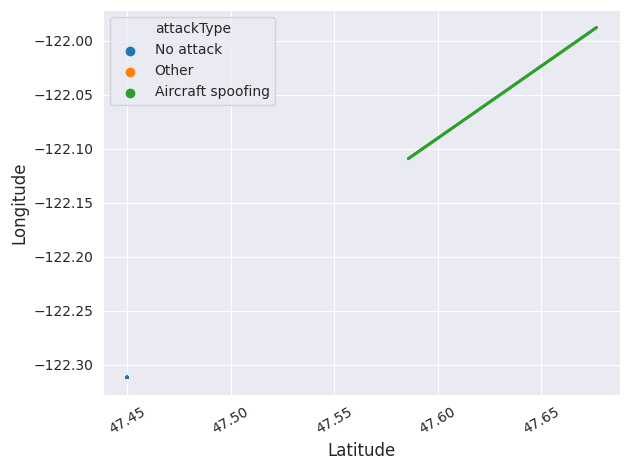

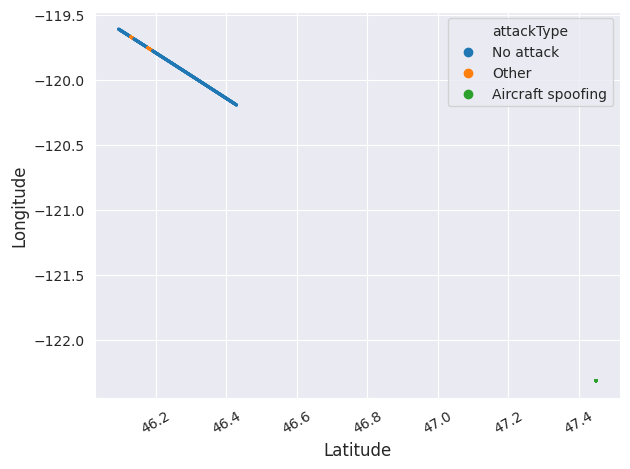

In [10]:
attk = "Aircraft spoofing"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x="latitude", y="longitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Latitude", fontsize=12)
    p.set_ylabel("Longitude", fontsize=12)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Ghost injection

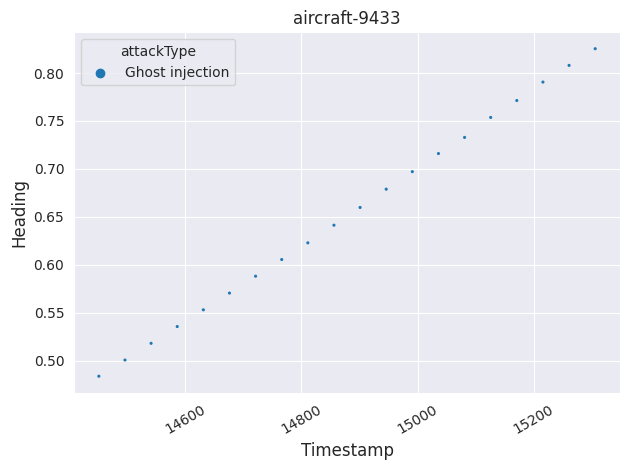

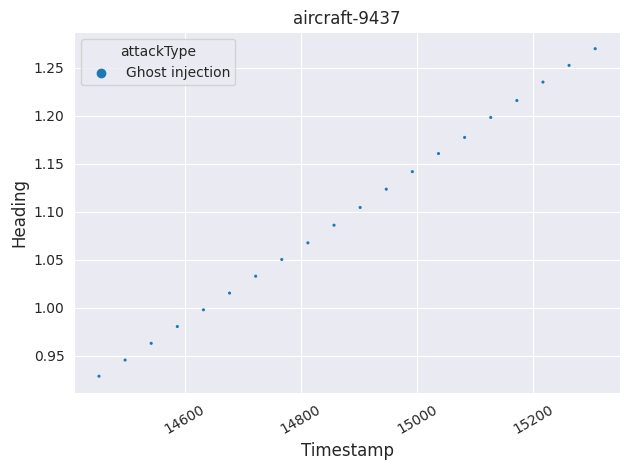

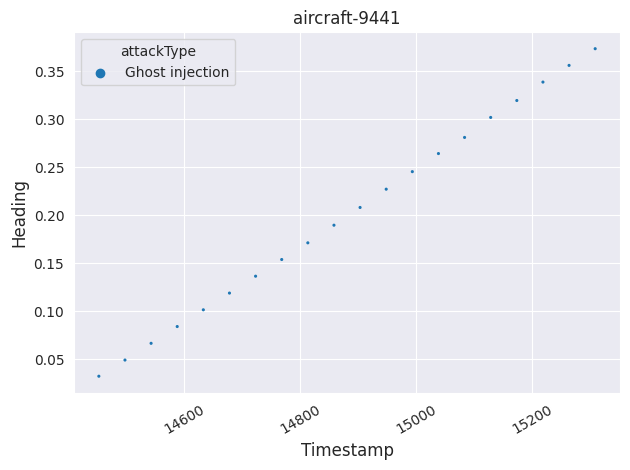

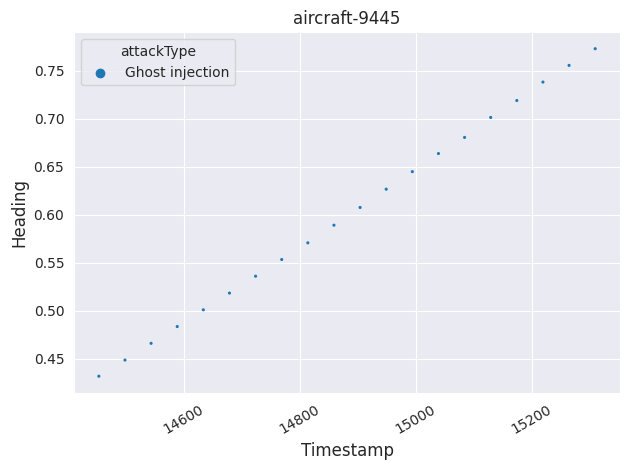

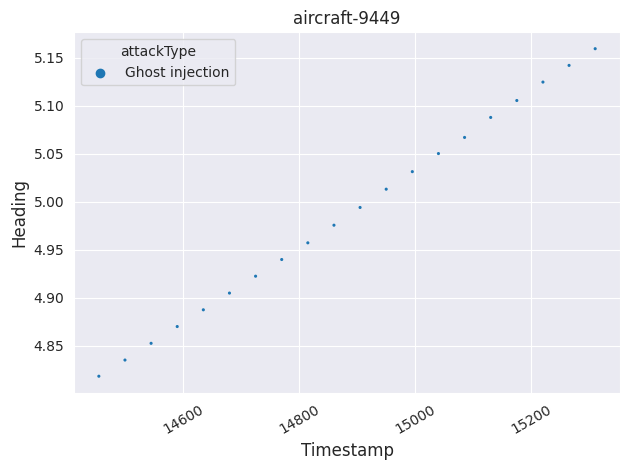

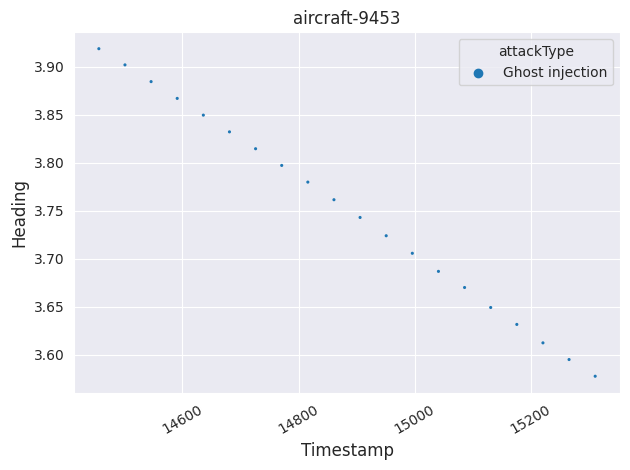

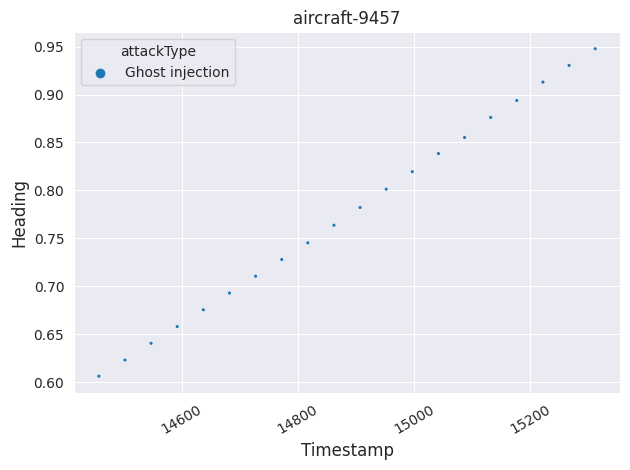

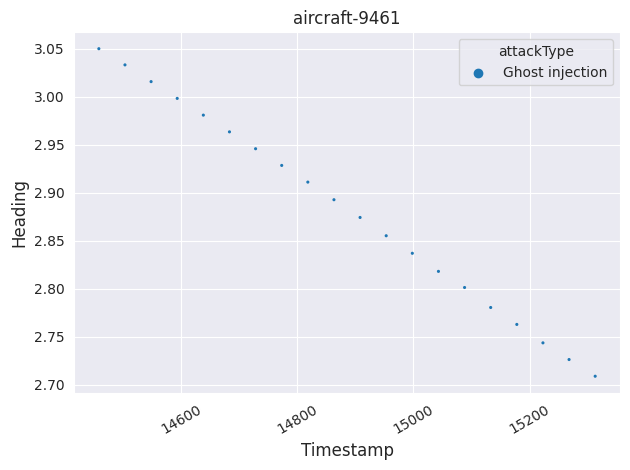

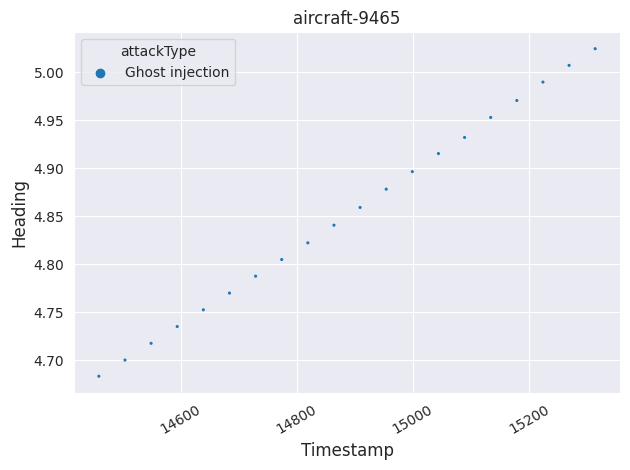

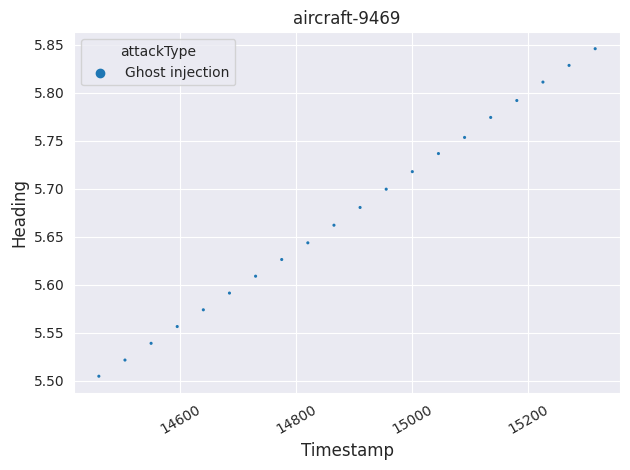

In [11]:
# not much to plot

attk = "Ghost injection"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="heading", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Message Delay

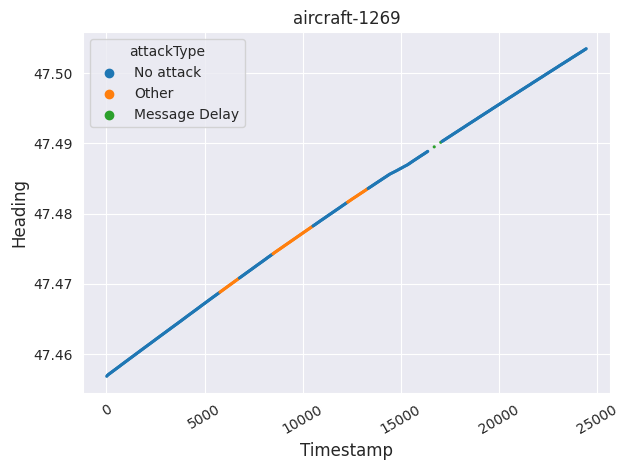

In [12]:
attk = "Message Delay"
id_list = df[df['attackType'] == attk]['id'].unique()

for i in id_list:
    sub = df[df['id'] == i]
    if len(sub['latitude'].unique()) == 1 and len(sub['longitude'].unique())==1:
        continue
    sub.loc[ ((sub["attackType"] != attk) & (sub["attackType"] != "No attack")), "attackType"] = 'Other'
    p = sns.scatterplot(data=sub, x=sub.index, y="latitude", hue="attackType", s=5 , linewidth=0)
    p.set_xlabel("Timestamp", fontsize=12)
    p.set_ylabel("Heading", fontsize=12)
    p.set_title(i)
    plt.xticks(rotation = 30)
    leg_handles = p.get_legend_handles_labels()[0]
    plt.tight_layout()
    plt.show()

Example of 3d plot

/tmp/ipykernel_77972/3302852815.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plot.tight_layout()


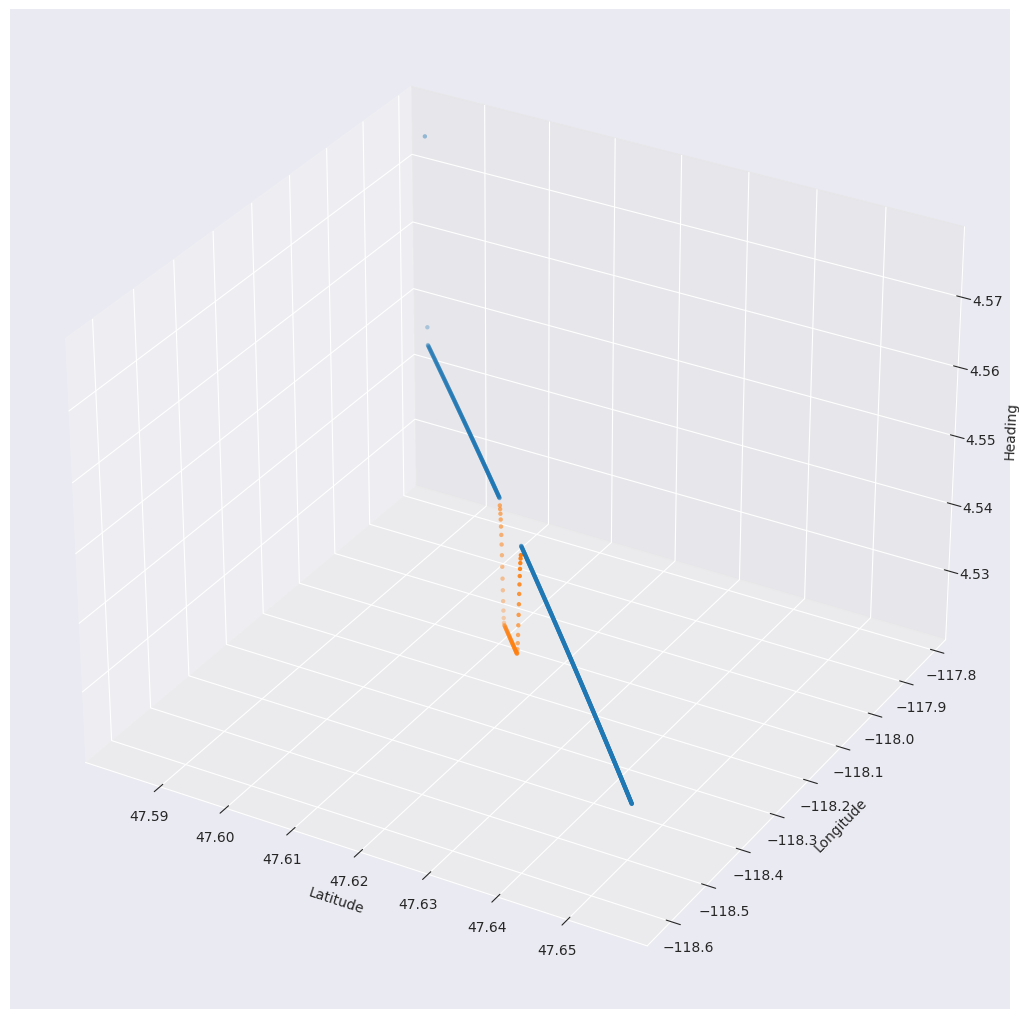

In [13]:
# example of trajectory modification

# extraction of the first aircraft affected
attk = "Trajectory modification"
id_trajectory_modification = df[df['attackType'] == "Trajectory modification"]['id'].unique().tolist()[0]
trajectory_modification = df[df['id'] == id_trajectory_modification]

x_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['latitude'] # and other attacks
y_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['longitude'] # and other attacks
z_legitim = trajectory_modification[trajectory_modification['attackType'] != attk]['heading'] # and other attacks

x_att = trajectory_modification[trajectory_modification['attackType'] == attk]['latitude']
y_att = trajectory_modification[trajectory_modification['attackType'] == attk]['longitude']
z_att = trajectory_modification[trajectory_modification['attackType'] == attk]['heading']

# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# keeps padding between figure elements

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter3D(x_legitim, y_legitim, z_legitim, s=10 , linewidth=0, label='No Attack')
ax.scatter3D(x_att, y_att, z_att, s=10 , linewidth=0, label='Trajectory modification' )

ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("Heading")

# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plot.tight_layout()
plot.show()